DATA SCIENCE        
MODULE 2

1. Statistical Hypothesis Testing           
Example: Flipping a Coin

In [2]:
import numpy as np
from scipy import stats

# Flipping a fair coin 100 times
np.random.seed(0)
flips = np.random.binomial(n=1, p=0.5, size=100)

# Null hypothesis: the coin is fair (p=0.5)
# Alternative hypothesis: the coin is not fair (p != 0.5)

# Performing a binomial test
successes = np.sum(flips)
n = len(flips)
p_value = stats.binom_test(successes, n, p=0.5)

print(f"Number of successes (heads): {successes}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: the coin is not fair.")
else:
    print("Fail to reject the null hypothesis: the coin is fair.")


Number of successes (heads): 49
p-value: 0.9204
Fail to reject the null hypothesis: the coin is fair.


C:\Users\Somashekar\AppData\Local\Temp\ipykernel_17604\2593330013.py:14: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(successes, n, p=0.5)


2. p-Values             
Example: One-sample t-test

In [3]:
import numpy as np
from scipy import stats

# Sample data: weights of 10 apples
np.random.seed(0)
weights = np.random.normal(loc=150, scale=10, size=10)

# Null hypothesis: mean weight = 150
# Alternative hypothesis: mean weight != 150

# Performing a one-sample t-test
mean_weight = 150
t_stat, p_value = stats.ttest_1samp(weights, mean_weight)

print(f"Sample weights: {weights}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: the mean weight is not 150.")
else:
    print("Fail to reject the null hypothesis: the mean weight is 150.")


Sample weights: [167.64052346 154.00157208 159.78737984 172.40893199 168.6755799
 140.2272212  159.50088418 148.48642792 148.96781148 154.10598502]
t-statistic: 2.2894
p-value: 0.0478
Reject the null hypothesis: the mean weight is not 150.


3. Confidence Intervals     
Example: Confidence Interval for the Mean

In [4]:
import numpy as np
from scipy import stats

# Sample data: weights of 10 apples
np.random.seed(0)
weights = np.random.normal(loc=150, scale=10, size=10)

# Calculate the mean and standard error of the sample
mean_weight = np.mean(weights)
sem = stats.sem(weights)

# Calculate the 95% confidence interval
confidence_level = 0.95
ci = stats.t.interval(confidence_level, len(weights) - 1, loc=mean_weight, scale=sem)

print(f"Sample weights: {weights}")
print(f"Mean weight: {mean_weight:.2f}")
print(f"95% Confidence interval: {ci}")


Sample weights: [167.64052346 154.00157208 159.78737984 172.40893199 168.6755799
 140.2272212  159.50088418 148.48642792 148.96781148 154.10598502]
Mean weight: 157.38
95% Confidence interval: (150.0879478263576, 164.67251558821908)


4. p-Hacking        
Example: Multiple Hypothesis Testing

In [5]:
import numpy as np
from scipy import stats

# Generate random data for 20 tests
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=(20, 100))

# Perform t-tests for each test
p_values = [stats.ttest_1samp(sample, 0).pvalue for sample in data]

# Correct for multiple comparisons using Bonferroni correction
alpha = 0.05
corrected_alpha = alpha / len(p_values)
significant_tests = [p < corrected_alpha for p in p_values]

print(f"p-values: {p_values}")
print(f"Corrected alpha: {corrected_alpha:.4f}")
print(f"Significant tests: {significant_tests}")
print(f"Number of significant tests: {sum(significant_tests)}")


p-values: [0.5562489158694675, 0.4321849976235336, 0.5372940969886615, 0.037649630800690885, 0.9043061628730487, 0.04986270990230205, 0.18373492638030836, 0.19457289621128643, 0.7635080920405451, 0.08595783760831756, 0.9750607310126727, 0.03835368175766419, 0.9830894905961739, 0.971396125831667, 0.6510329749117026, 0.5531805791661468, 0.5090936465281471, 0.5258329993830606, 0.28153030201690954, 0.7384661154418499]
Corrected alpha: 0.0025
Significant tests: [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
Number of significant tests: 0


5. Example: Running an A/B Test     
Example: A/B Test

In [6]:
import numpy as np
from scipy import stats

# Simulated data for an A/B test
np.random.seed(0)
control = np.random.binomial(1, 0.4, 100)  # Control group with 40% success rate
treatment = np.random.binomial(1, 0.5, 100)  # Treatment group with 50% success rate

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control, treatment)

print(f"Control group mean: {np.mean(control):.2f}")
print(f"Treatment group mean: {np.mean(treatment):.2f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: there is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference between the groups.")


Control group mean: 0.38
Treatment group mean: 0.57
t-statistic: -2.7267
p-value: 0.0070
Reject the null hypothesis: there is a significant difference between the groups.


6. Bayesian Inference       
Example: Bayesian Updating for a Binomial Distribution

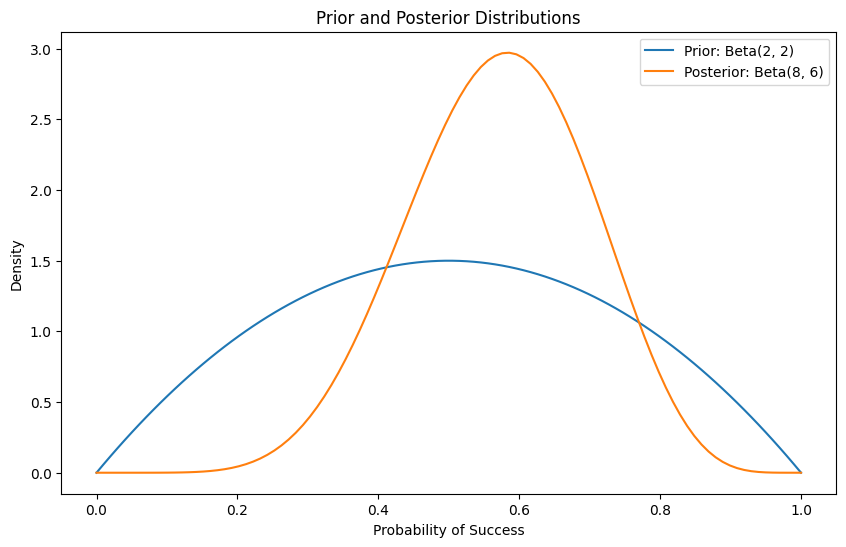

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters
alpha_prior = 2
beta_prior = 2

# Observed data: 6 heads and 4 tails
successes = 6
failures = 4

# Posterior parameters
alpha_post = alpha_prior + successes
beta_post = beta_prior + failures

# Plotting the prior and posterior distributions
x = np.linspace(0, 1, 100)
prior = beta(alpha_prior, beta_prior).pdf(x)
posterior = beta(alpha_post, beta_post).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label=f'Prior: Beta({alpha_prior}, {beta_prior})')
plt.plot(x, posterior, label=f'Posterior: Beta({alpha_post}, {beta_post})')
plt.xlabel('Probability of Success')
plt.ylabel('Density')
plt.legend()
plt.title('Prior and Posterior Distributions')
plt.show()


7. Gradient Descent     
Example: Gradient Descent to Minimize a Quadratic Function

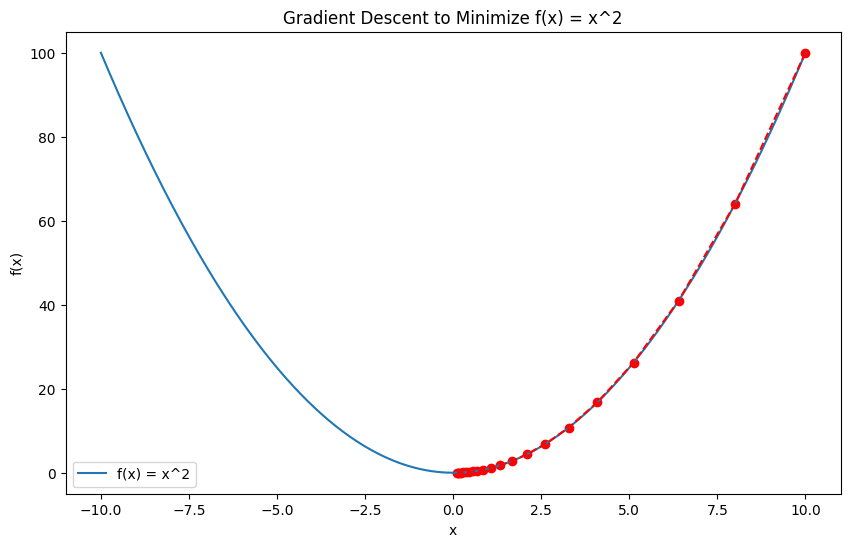

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Quadratic function: f(x) = x^2
def f(x):
    return x ** 2

# Derivative of the quadratic function: f'(x) = 2x
def f_prime(x):
    return 2 * x

# Gradient descent parameters
x0 = 10  # Initial guess
learning_rate = 0.1
iterations = 20

# Performing gradient descent
x = x0
x_values = [x]

for _ in range(iterations):
    x -= learning_rate * f_prime(x)
    x_values.append(x)

# Plotting the function and the gradient descent steps
x_range = np.linspace(-10, 10, 400)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='f(x) = x^2')
plt.scatter(x_values, [f(x) for x in x_values], color='red')
plt.plot(x_values, [f(x) for x in x_values], color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent to Minimize f(x) = x^2')
plt.legend()
plt.show()


8. Minibatch and Stochastic Gradient Descent        
Example: Stochastic Gradient Descent (SGD) for Linear Regression

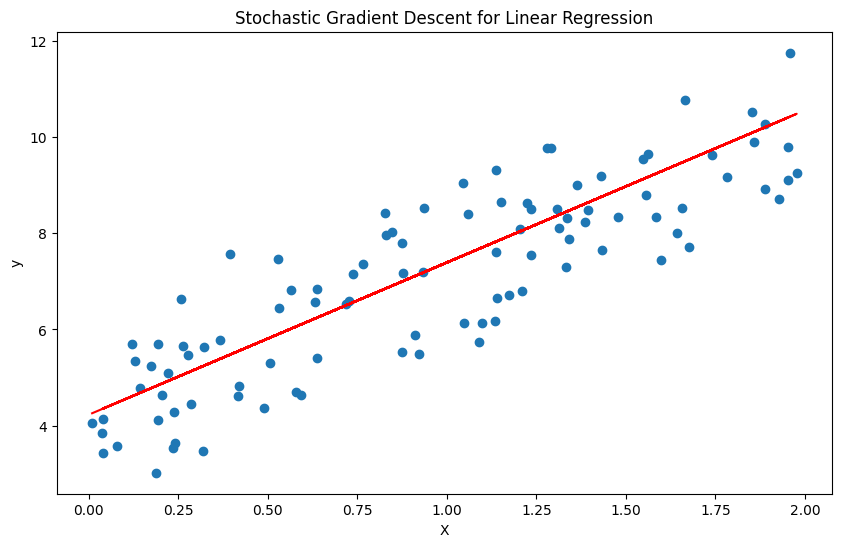

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term (intercept) to the feature matrix
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)
learning_rate = 0.1
iterations = 50

# Stochastic Gradient Descent
for iteration in range(iterations):
    for i in range(100):
        random_index = np.random.randint(100)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients

# Plotting the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Stochastic Gradient Descent for Linear Regression')
plt.show()


9. Data Handling        
Example: Reading Files

In [1]:


def read_file(filename):
    with open(filename, 'r') as file:
        data = file.readlines()
    data = [line.strip().split(',') for line in data]
    return data

filename = 'data.txt'
data = read_file(filename)
print(data)


[['1', '2', '3'], ['4', '5', '6'], ['7', '8', '9']]


10. Scraping the Web        
Example: Web Scraping with BeautifulSoup

In [2]:
import requests
from bs4 import BeautifulSoup

# URL to scrape
url = 'http://example.com'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Extract and print the title of the webpage
title = soup.title.string
print('Title:', title)

# Extract and print all paragraph texts
paragraphs = soup.find_all('p')
for p in paragraphs:
    print(p.text)


Title: Example Domain
This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
More information...


12. Working with Data       
Exploring Your Data     

Example: Basic Data Exploration with Pandas

In [4]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Display basic information about the DataFrame
print(df.info())

# Display basic statistics of the DataFrame
print(df.describe())

# Display the first few rows of the DataFrame
print(df.head())

# Display the correlation matrix of the DataFrame
print(df.corr())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int64
 1   B       5 non-null      int64
 2   C       5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes
None
              A         B         C
count  5.000000  5.000000  5.000000
mean   3.000000  3.000000  4.000000
std    1.581139  1.581139  1.581139
min    1.000000  1.000000  2.000000
25%    2.000000  2.000000  3.000000
50%    3.000000  3.000000  4.000000
75%    4.000000  4.000000  5.000000
max    5.000000  5.000000  6.000000
   A  B  C
0  1  5  2
1  2  4  3
2  3  3  4
3  4  2  5
4  5  1  6
     A    B    C
A  1.0 -1.0  1.0
B -1.0  1.0 -1.0
C  1.0 -1.0  1.0


13. Using NamedTuples       
Example: Creating and Using NamedTuples

In [5]:
from collections import namedtuple

# Define a namedtuple
Point = namedtuple('Point', ['x', 'y'])

# Create an instance of the namedtuple
p = Point(1, 2)

# Access elements by name
print('x:', p.x)
print('y:', p.y)

# Access elements by index
print('x:', p[0])
print('y:', p[1])


x: 1
y: 2
x: 1
y: 2


14. Dataclasses     
Example: Creating and Using Dataclasses

In [6]:
from dataclasses import dataclass

@dataclass
class Point:
    x: int
    y: int

# Create an instance of the dataclass
p = Point(1, 2)

# Access elements
print('x:', p.x)
print('y:', p.y)

# Print the dataclass instance
print(p)


x: 1
y: 2
Point(x=1, y=2)


15. Cleaning and Munging        
Example: Data Cleaning with Pandas

In [7]:
import pandas as pd

# Create a sample DataFrame with missing values
data = {
    'A': [1, 2, None, 4, 5],
    'B': [None, 4, 3, 2, 1],
    'C': [2, None, 4, None, 6]
}
df = pd.DataFrame(data)

# Display the original DataFrame
print('Original DataFrame:')
print(df)

# Drop rows with missing values
df_dropped = df.dropna()
print('\nDataFrame after dropping rows with missing values:')
print(df_dropped)

# Fill missing values with a specified value
df_filled = df.fillna(0)
print('\nDataFrame after filling missing values with 0:')
print(df_filled)

# Fill missing values with the mean of the column
df_filled_mean = df.fillna(df.mean())
print('\nDataFrame after filling missing values with column mean:')
print(df_filled_mean)


Original DataFrame:
     A    B    C
0  1.0  NaN  2.0
1  2.0  4.0  NaN
2  NaN  3.0  4.0
3  4.0  2.0  NaN
4  5.0  1.0  6.0

DataFrame after dropping rows with missing values:
     A    B    C
4  5.0  1.0  6.0

DataFrame after filling missing values with 0:
     A    B    C
0  1.0  0.0  2.0
1  2.0  4.0  0.0
2  0.0  3.0  4.0
3  4.0  2.0  0.0
4  5.0  1.0  6.0

DataFrame after filling missing values with column mean:
     A    B    C
0  1.0  2.5  2.0
1  2.0  4.0  4.0
2  3.0  3.0  4.0
3  4.0  2.0  4.0
4  5.0  1.0  6.0


16. Manipulating Data       
Example: Data Manipulation with Pandas

In [8]:
import pandas as pd

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Adding a new column
df['D'] = df['A'] + df['B']
print('DataFrame after adding column D:')
print(df)

# Renaming columns
df.rename(columns={'A': 'Alpha', 'B': 'Beta'}, inplace=True)
print('\nDataFrame after renaming columns:')
print(df)

# Filtering rows
filtered_df = df[df['Alpha'] > 2]
print('\nFiltered DataFrame where Alpha > 2:')
print(filtered_df)

# Grouping and aggregating data
grouped_df = df.groupby('C').mean()
print('\nGrouped and aggregated DataFrame (mean of each group in column C):')
print(grouped_df)


DataFrame after adding column D:
   A  B  C  D
0  1  5  2  6
1  2  4  3  6
2  3  3  4  6
3  4  2  5  6
4  5  1  6  6

DataFrame after renaming columns:
   Alpha  Beta  C  D
0      1     5  2  6
1      2     4  3  6
2      3     3  4  6
3      4     2  5  6
4      5     1  6  6

Filtered DataFrame where Alpha > 2:
   Alpha  Beta  C  D
2      3     3  4  6
3      4     2  5  6
4      5     1  6  6

Grouped and aggregated DataFrame (mean of each group in column C):
   Alpha  Beta    D
C                  
2    1.0   5.0  6.0
3    2.0   4.0  6.0
4    3.0   3.0  6.0
5    4.0   2.0  6.0
6    5.0   1.0  6.0


17. Rescaling       
Example: Data Rescaling with Scikit-Learn

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)
print('DataFrame before rescaling \n',df.head())
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print('DataFrame after Min-Max Scaling:')
print(df_min_max_scaled)

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print('\nDataFrame after Standard Scaling:')
print(df_standard_scaled)


DataFrame before rescaling 
    A  B  C
0  1  5  2
1  2  4  3
2  3  3  4
3  4  2  5
4  5  1  6
DataFrame after Min-Max Scaling:
      A     B     C
0  0.00  1.00  0.00
1  0.25  0.75  0.25
2  0.50  0.50  0.50
3  0.75  0.25  0.75
4  1.00  0.00  1.00

DataFrame after Standard Scaling:
          A         B         C
0 -1.414214  1.414214 -1.414214
1 -0.707107  0.707107 -0.707107
2  0.000000  0.000000  0.000000
3  0.707107 -0.707107  0.707107
4  1.414214 -1.414214  1.414214


18. An Aside: tqdm      
Example: Progress Bar with tqdm

In [12]:
from tqdm import tqdm
import time

# Simulate a process that takes time using tqdm
for i in tqdm(range(10)):
    time.sleep(0.5)  # Simulate work by sleeping for 0.5 seconds


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


19. Dimensionality Reduction        
Example: PCA with Scikit-Learn

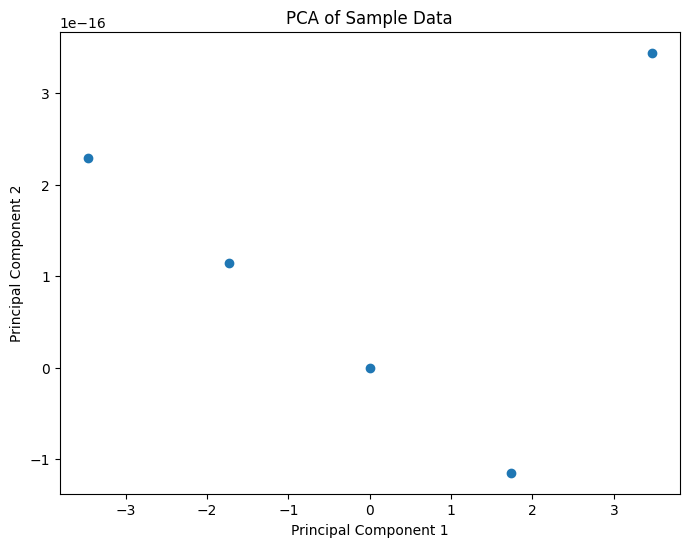

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sample Data')
plt.show()
